### Context:

Exploring Employee Salaries and Job Roles Across Industries.

### About Dataset
Welcome to the Employee Salaries for Different Job Roles Dataset! This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

### Content:

The dataset contains the following fields:

- work_year: The year of employment.
- experience_level: The experience level of the employee (e.g., entry-level, mid-level, senior).
- employment_type: The type of employment (e.g., full-time, part-time, contract).
- job_title: The job title or position of the employee within the company.
- salary: The salary amount in the local currency.
- salary_currency: The currency in which the salary is denoted.
- salary_in_usd: The equivalent salary amount in USD (United States Dollars).
- employee_residence: The location of the employee's residence.
- remote_ratio: The percentage of remote work allowed for the position.
- company_location: The location of the company.
- company_size: The size of the company (e.g., small, medium, large).

## Usage:

This dataset can be utilized for various purposes, including but not limited to:

- Analyzing salary trends across different job titles and experience levels.
- Investigating the impact of remote work on compensation.
- Comparing salary levels between full-time and part-time employment.
- Understanding the correlation between company size and employee salaries.
- Predictive analysis for forecasting salaries based on experience and job roles.

# Steps to Perform.
1. Import Packages & Reading Dataset.
2. Basic Information.
3. Data Cleaning
4. EDA : Exploratory Data Analysis
5. Summary

## Step 1.1: Importing the packages

In [1]:
## importing the necessary dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
%matplotlib inline

In [2]:
## supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## setting the max row & columns display to 130
pd.set_option("display.max_columns",130)
pd.set_option("display.max_rows",130)

## Step 1.2: Importing the dataset

In [55]:
PATH  = "./ds_salaries.csv"
df = pd.read_csv(PATH,index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 2. Basic Information.

In [5]:
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df.shape[0]}"
num_cols = f"No. of cols: {df.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset--------------------------->")
print(dimentation)

<-----------------------Shape of dataset--------------------------->
No. of rows: 607 x No. of cols: 11


In [6]:
## Step 2.2 Data type info about the datasets.
df.info()   ## This method prints the dtypes info and the no of cols and row in datasets.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


### Observations:
- All the column is in right dtype except the year column.
- there are no missing values in the columns that need to be handled.

## 3. Data Cleaning

In [7]:
df.isnull().sum() ##Checking the numbers of missing values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
round(df.isnull().sum()/len(df),2)*100 ## Checking the percentage of missing values.

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [10]:
# NO columns is having missing valuses.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           607 non-null    datetime64[ns]
 1   experience_level    607 non-null    object        
 2   employment_type     607 non-null    object        
 3   job_title           607 non-null    object        
 4   salary              607 non-null    int64         
 5   salary_currency     607 non-null    object        
 6   salary_in_usd       607 non-null    int64         
 7   employee_residence  607 non-null    object        
 8   remote_ratio        607 non-null    int64         
 9   company_location    607 non-null    object        
 10  company_size        607 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 56.9+ KB


In [27]:
## Checking the span of the data set
print(f"The data set spans from {min(df.work_year)} to {max(df.work_year)}")

The data set spans from 2020 to 2022


In [28]:
## Checking unique values in columns
b={}
for i in df.columns:
    b.update({i:df[i].nunique()})
print(b)

{'work_year': 3, 'experience_level': 4, 'employment_type': 4, 'job_title': 50, 'salary': 272, 'salary_currency': 17, 'salary_in_usd': 369, 'employee_residence': 57, 'remote_ratio': 3, 'company_location': 50, 'company_size': 3}


In [29]:
## Checking description and count of unique values in columns
for i in df.columns:
    print(df[i].value_counts())

2022    318
2021    217
2020     72
Name: work_year, dtype: int64
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analy

In [10]:
## Final Data Set
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### 4. EDA : Exploratory Data Analysis

In [11]:
## Basic Descerete Statistic Analysis on Application dataset.
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [25]:
## The above description shows that the data points belong from year 2020 to 2022.
## The mean salary in usd is 112297.87 with a standard deviation of 70957.25 usd.

In [12]:
CAT_COLS = [col for col in df if df[col].dtype =="O"]
NUM_COLS = [col for col in df if df[col].dtype !="O"]

print(f"No. of categorical Columns:{len(CAT_COLS)}")
print(f"No. of numerical Columns:{len(NUM_COLS)}")

No. of categorical Columns:7
No. of numerical Columns:4


In [27]:
## Starting EDA with Categorical columns.

In [13]:
CAT_COLS

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [28]:
## experience_level wise data point Count

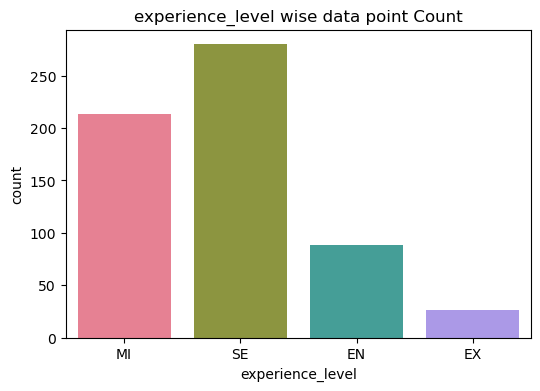

In [25]:
plt.figure(figsize = (6,4))
sns.countplot(df,x="experience_level",palette="husl")
plt.title("experience_level wise data point Count")
plt.show()

In [31]:
## employment_type wise data point distribution.

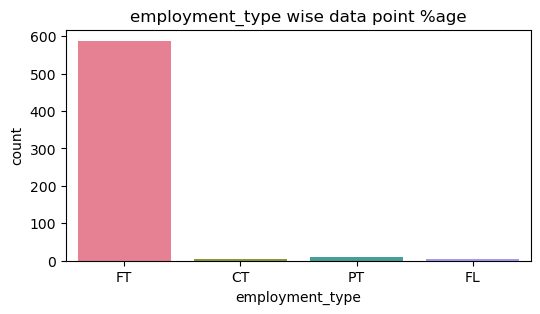

In [21]:
plt.figure(figsize = (6,3))
sns.countplot(df,x="employment_type",palette="husl")
plt.title("employment_type wise data point %age")
plt.show()

In [ ]:
## Most of the employees in the data set are FT - Full time employee.

In [ ]:
## job_title wise data point distribution.

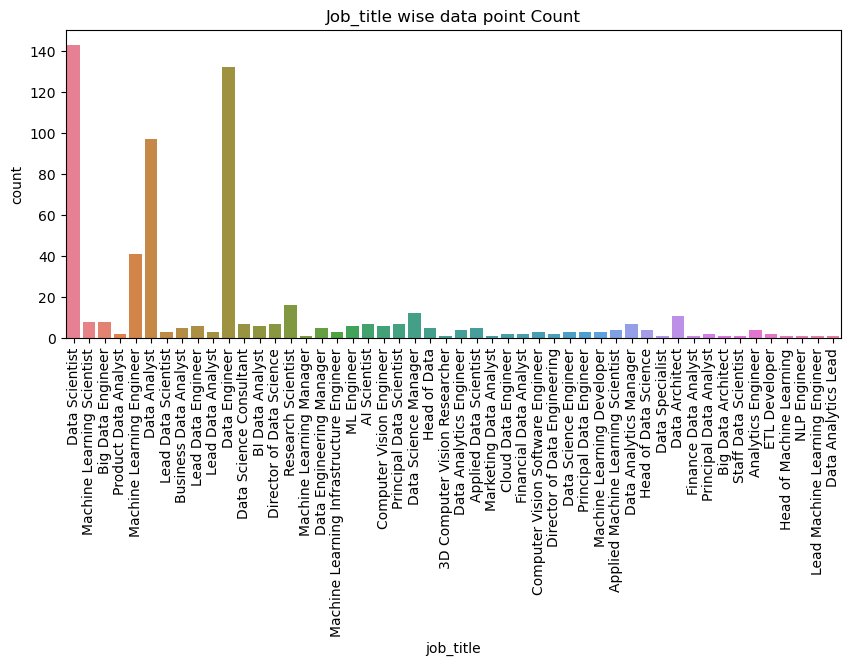

In [24]:
plt.figure(figsize = (10,4))
sns.countplot(df,x="job_title",palette="husl").tick_params(axis="x",rotation=90)
plt.title("Job_title wise data point Count")
plt.show()

In [ ]:
## In total of 607 data point, 140 Employees having job title of Data Scientist. 

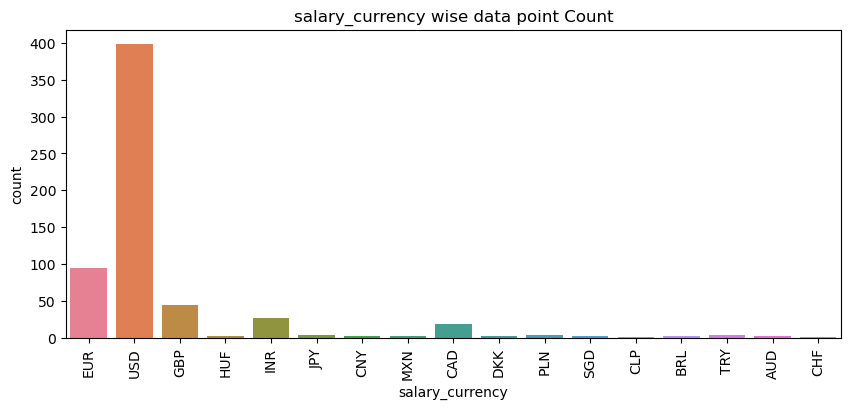

In [26]:
## salary_currency wise data point distribution.
plt.figure(figsize = (10,4))
sns.countplot(df,x="salary_currency",palette="husl").tick_params(axis="x",rotation=90)
plt.title("salary_currency wise data point Count")
plt.show()

In [ ]:
## Most of the employees are paid in USD dollar.

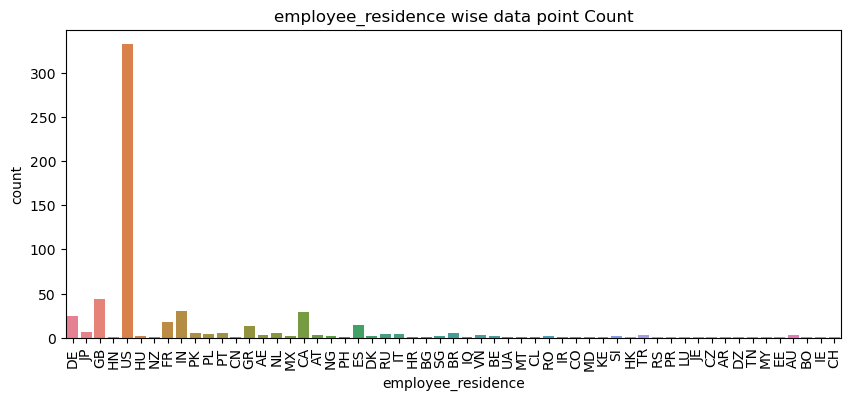

In [27]:
## employee_residence wise data point distribution.
plt.figure(figsize = (10,4))
sns.countplot(df,x="employee_residence",palette="husl").tick_params(axis="x",rotation=90)
plt.title("employee_residence wise data point Count")
plt.show()

In [ ]:
## Most of the employees are US recidence.

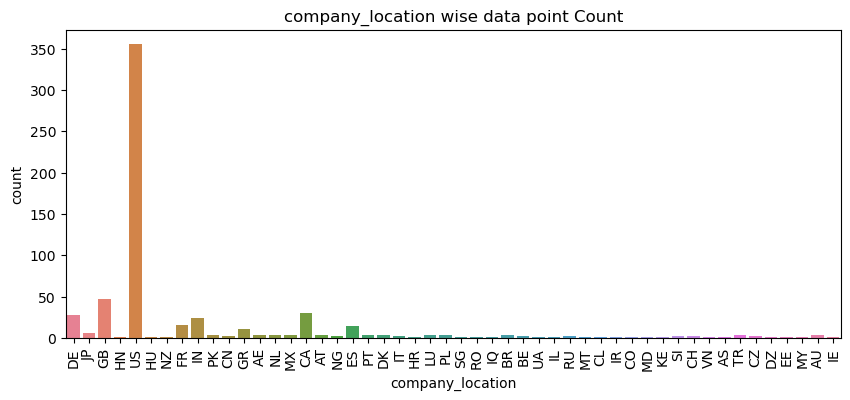

In [28]:
## company_location wise data point distribution.
plt.figure(figsize = (10,4))
sns.countplot(df,x="company_location",palette="husl").tick_params(axis="x",rotation=90)
plt.title("company_location wise data point Count")
plt.show()

In [ ]:
## Most of the companies are located in US.

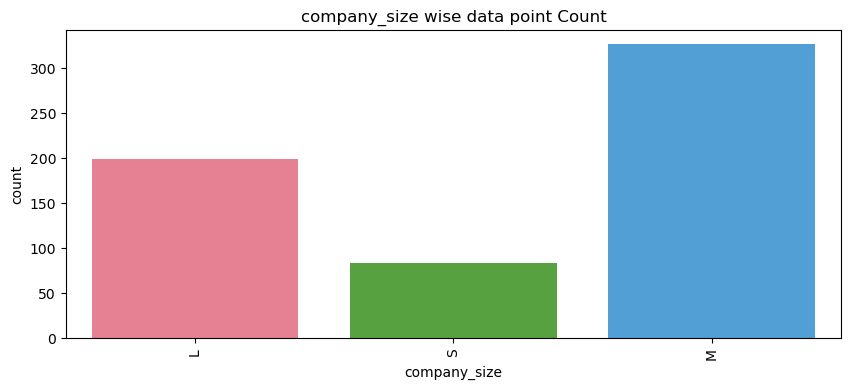

In [29]:
## company_size wise data point distribution.
plt.figure(figsize = (10,4))
sns.countplot(df,x="company_size",palette="husl").tick_params(axis="x",rotation=90)
plt.title("company_size wise data point Count")
plt.show()

In [ ]:
## Above 300 compainies are Medium scale company.

## EDA of Numerical Columns

In [33]:
NUM_COLS_filt = NUM_COLS[1:3]

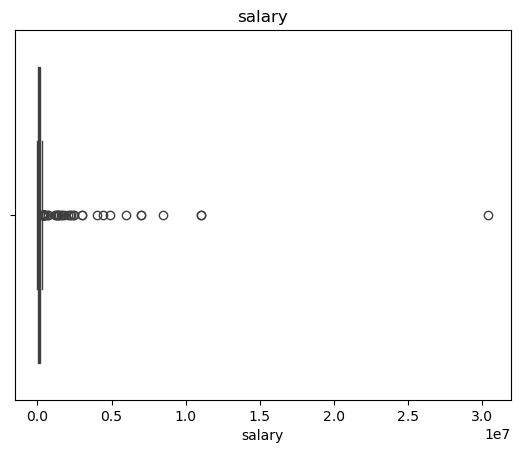

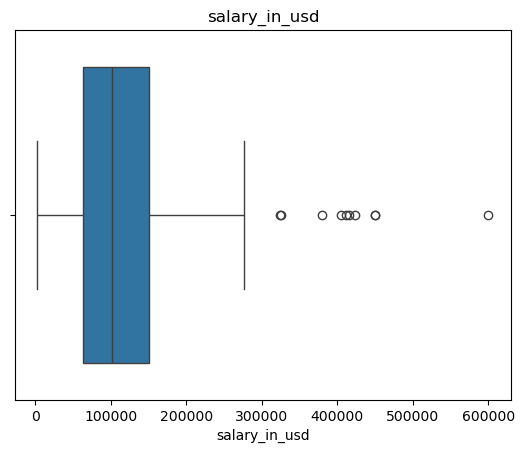

In [35]:
for i in NUM_COLS_filt:
    sns.boxplot(data =df, x=i)
    plt.title(i)
    plt.show()

## Bivariate Analysis

In [41]:
CAT_COLS

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

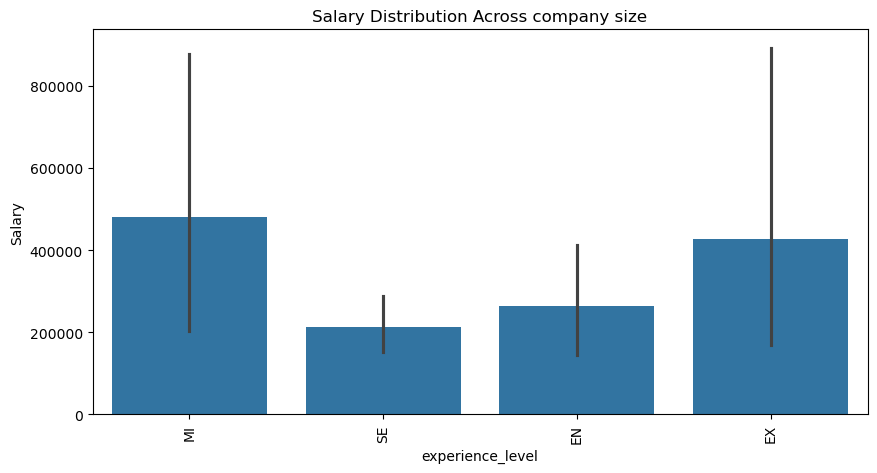

In [42]:
# Salary distribution across experience_level
plt.figure(figsize=(10, 5))
sns.barplot(x='experience_level', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across company size')
plt.xlabel('experience_level')
plt.ylabel('Salary')
plt.show()

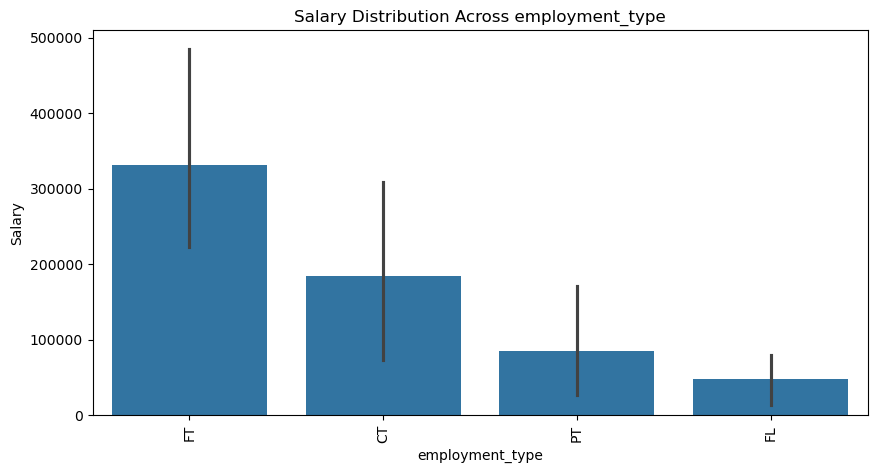

In [43]:
# Salary distribution across employment_type
plt.figure(figsize=(10, 5))
sns.barplot(x='employment_type', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across employment_type')
plt.xlabel('employment_type')
plt.ylabel('Salary')
plt.show()

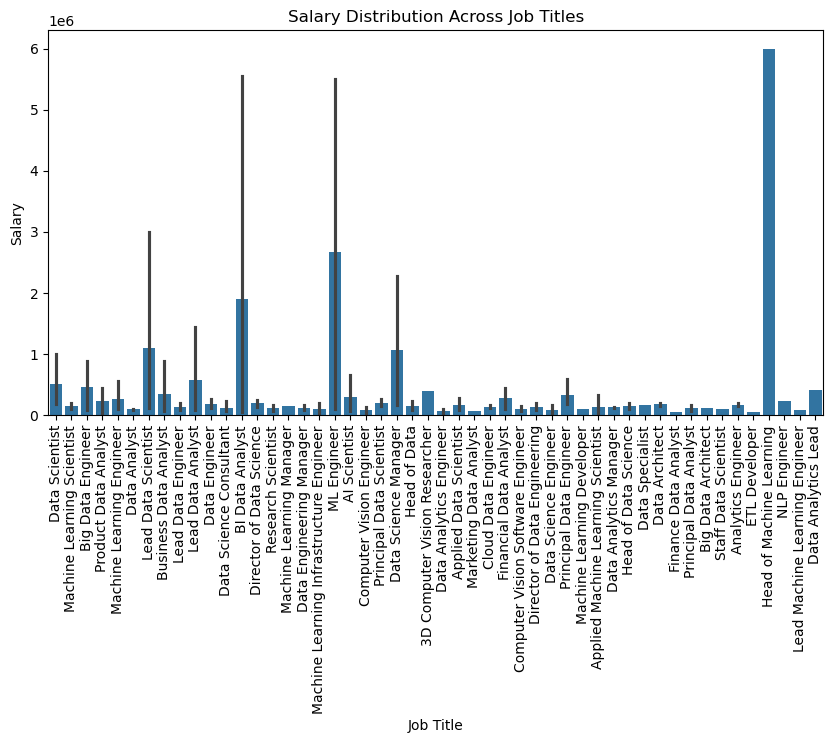

In [44]:
# Salary distribution across job title
plt.figure(figsize=(10, 5))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

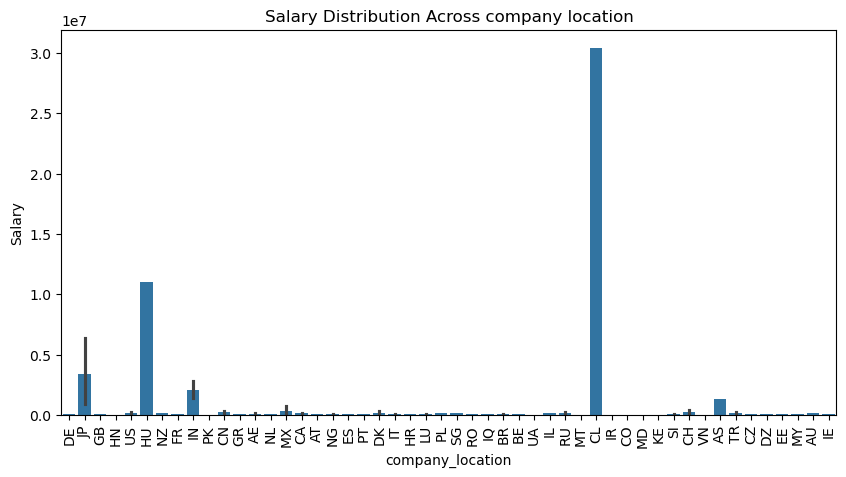

In [45]:
# Salary distribution across company_location
plt.figure(figsize=(10, 5))
sns.barplot(x='company_location', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across company location')
plt.xlabel('company_location')
plt.ylabel('Salary')
plt.show()

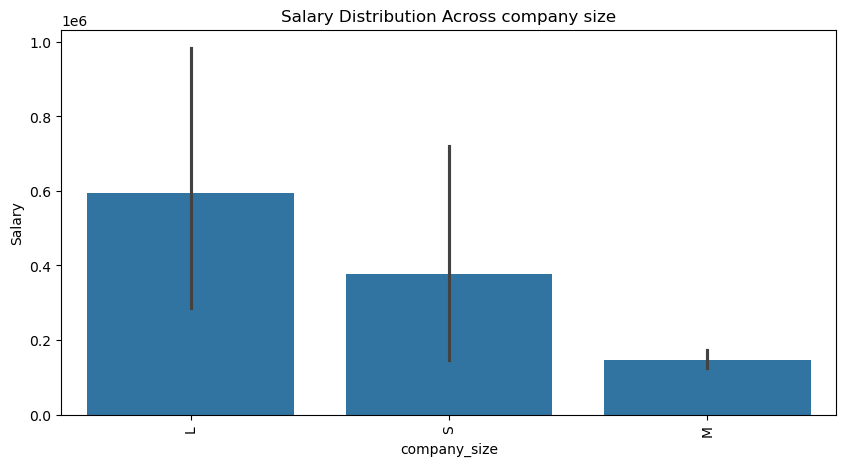

In [46]:
# Salary distribution across company_size
plt.figure(figsize=(10, 5))
sns.barplot(x='company_size', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across company size')
plt.xlabel('company_size')
plt.ylabel('Salary')
plt.show()

In [47]:
NUM_COLS

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

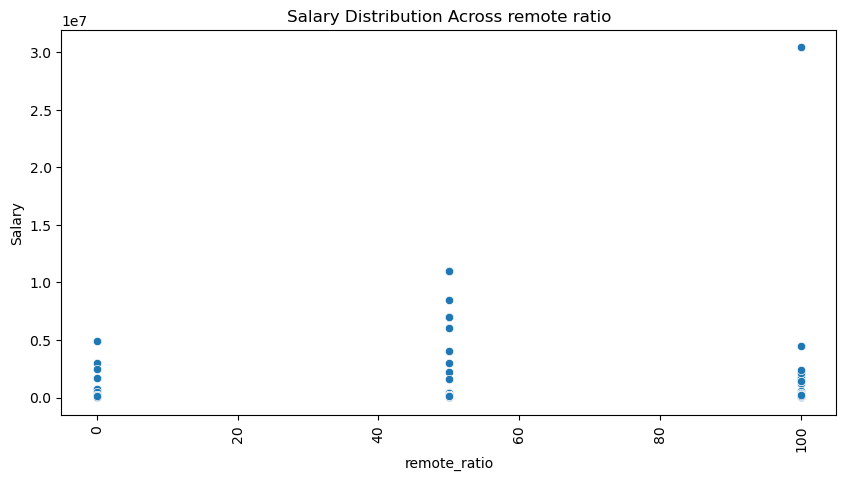

In [48]:
# Salary distribution across remote_ratio
plt.figure(figsize=(10, 5))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across remote ratio')
plt.xlabel('remote_ratio')
plt.ylabel('Salary')
plt.show()

In [49]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [65]:
## Aggregating Data based upon the job_title.
data = df.groupby(df["job_title"])["salary_in_usd"].mean()
data = data.reset_index()

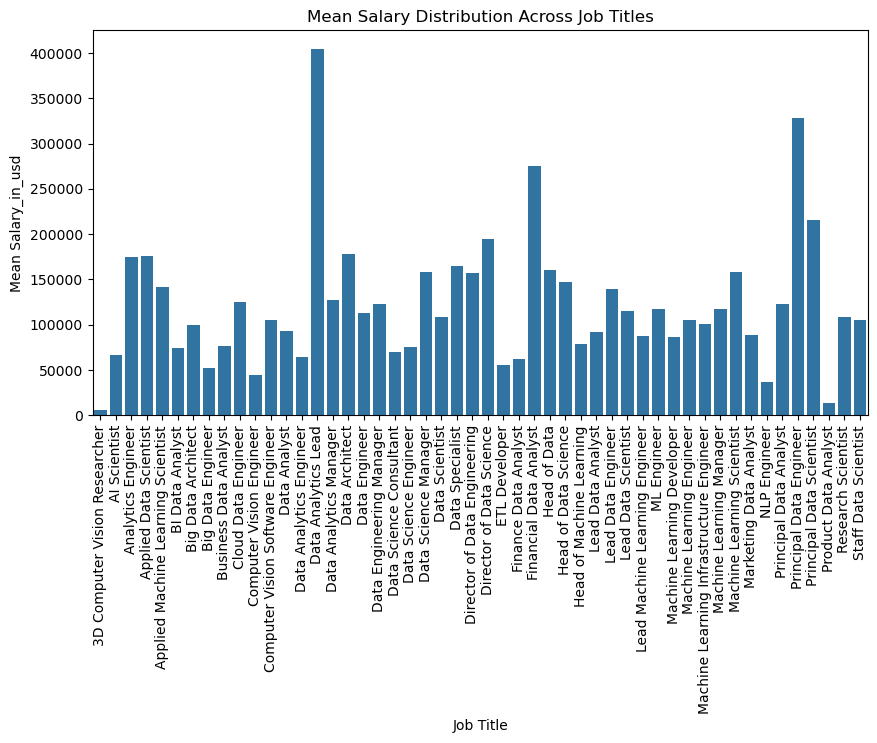

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x='job_title', y='salary_in_usd', data=data)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary_in_usd')
plt.show()

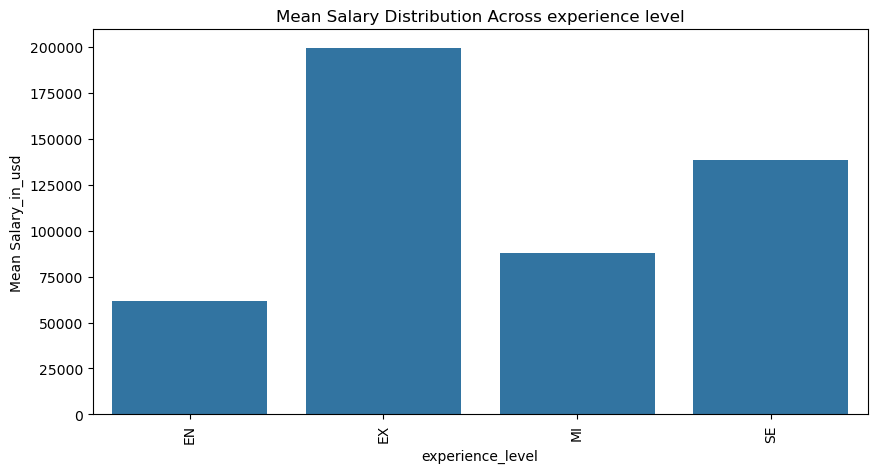

In [67]:
## Aggregating Data based upon the experience_level.
data2 = df.groupby(df["experience_level"])["salary_in_usd"].mean()
data2 = data2.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='experience_level', y='salary_in_usd', data=data2)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across experience level')
plt.xlabel('experience_level')
plt.ylabel('Mean Salary_in_usd')
plt.show()

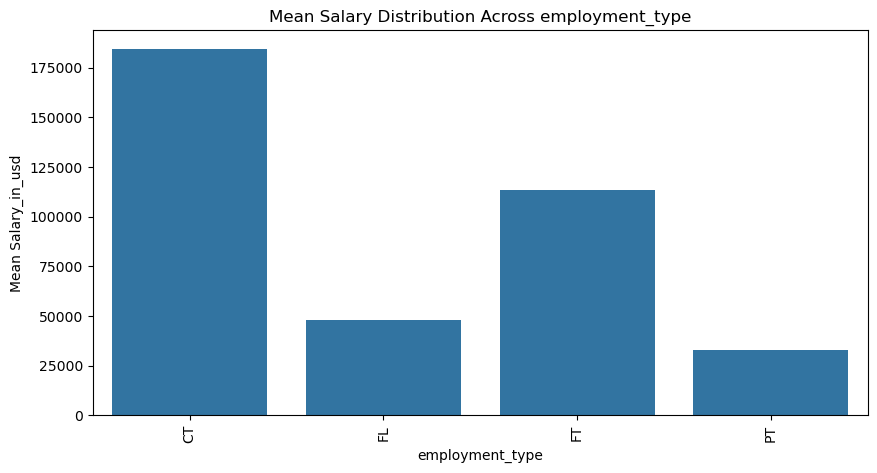

In [68]:
## Aggregating Data based upon the employment_type.
data3 = df.groupby(df["employment_type"])["salary_in_usd"].mean()
data3 = data3.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='employment_type', y='salary_in_usd', data=data3)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across employment_type')
plt.xlabel('employment_type')
plt.ylabel('Mean Salary_in_usd')
plt.show()

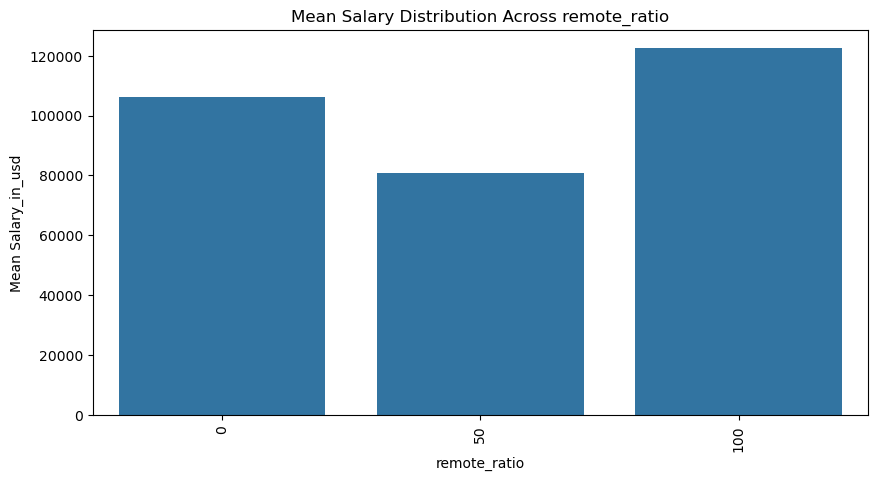

In [69]:
## Aggregating Data based upon the remote_ratio.
data4 = df.groupby(df["remote_ratio"])["salary_in_usd"].mean()
data4 = data4.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data4)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across remote_ratio')
plt.xlabel('remote_ratio')
plt.ylabel('Mean Salary_in_usd')
plt.show()

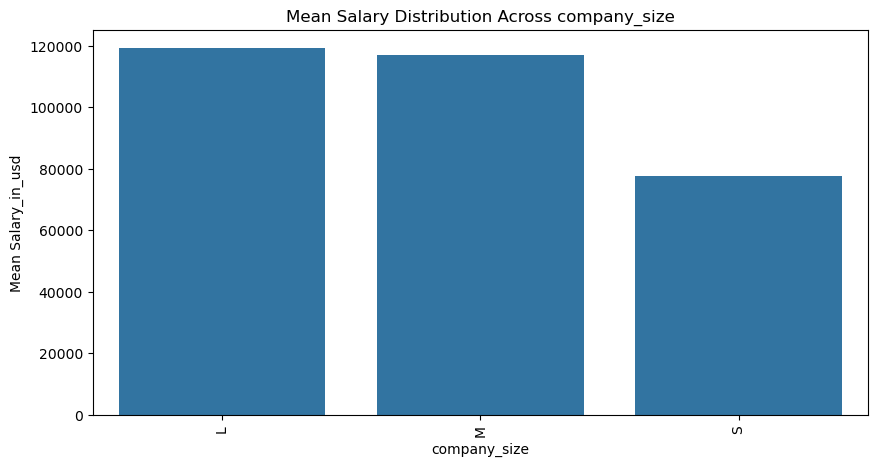

In [70]:
## Aggregating Data based upon the company_size.
data5 = df.groupby(df["company_size"])["salary_in_usd"].mean()
data5 = data5.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='company_size', y='salary_in_usd', data=data5)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across company_size')
plt.xlabel('company_size')
plt.ylabel('Mean Salary_in_usd')
plt.show()

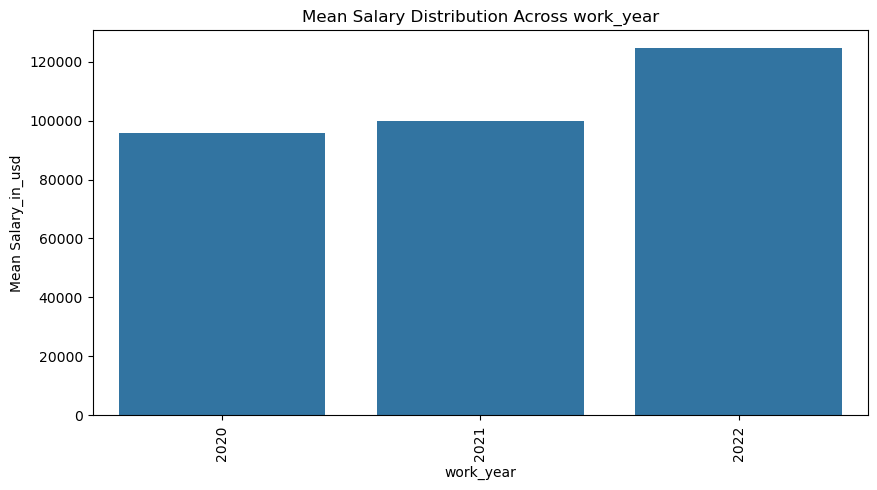

In [72]:
## Aggregating Data based upon the work_year.
data6 = df.groupby(df["work_year"])["salary_in_usd"].mean()
data6 = data6.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='work_year', y='salary_in_usd', data=data6)
plt.xticks(rotation=90)
plt.title('Mean Salary Distribution Across work_year')
plt.xlabel('work_year')
plt.ylabel('Mean Salary_in_usd')
plt.show()

# 5. Summary

In [71]:
## The Mean salary for a Data analytics leads is the Highest among all the job title.
## As the Experience increases the Mean Salary also increase.
## CT Employees having more average salary than the FT employee. FT are paid more than the PT employees.
## 100% remote ratio employees are having greater mean salary average than the 0% remote ratio employees.
## But the 50 remote ratio employees are not wel compensated as they having lower mean salary average than the 0% remote ratio employees.
## Large and medium scale companies almost equal mean salary.
